In [8]:
import numpy as np
from mytorch.tensor import Tensor
from mytorch.model import Model
from mytorch.layer.linear import Linear
from mytorch.activation.relu import relu
from mytorch.activation.softmax import softmax
from mytorch.loss.mse import MeanSquaredError
from mytorch.optimizer import Adam
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
train_data = pd.read_csv('Iris-Train.csv')
test_data = pd.read_csv('Iris-Test.csv')

X_train = train_data.iloc[:, :-1].values
y_train = train_data['Species'].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data['Species'].values

species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
y_train = np.array([species_mapping[species] for species in y_train])
y_test = np.array([species_mapping[species] for species in y_test])

y_train = np.eye(3)[y_train]
y_test = np.eye(3)[y_test]

In [10]:
class Model(Model):
    def __init__(self):
        super().__init__()
        self.layer1 = Linear(4, 10)
        self.layer2 = Linear(10, 3)
    
    def forward(self, x):
        x = self.layer1.forward(x)
        x = relu(x)
        x = self.layer2.forward(x)
        return softmax(x)


In [11]:
model = Model()
criterion = MeanSquaredError
optimizer = Adam(model.parameters(), learning_rate=0.001)


In [12]:
train_accs = []
test_accs = []

num_epochs = 750
for epoch in range(num_epochs):
    inputs = Tensor(X_train, requires_grad=True)
    labels = Tensor(y_train, requires_grad=False)
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.data}')
        
    train_predictions = np.argmax(outputs.data, axis=1)
    train_accuracy = (train_predictions == np.argmax(y_train, axis=1)).mean() * 100
    train_accs.append(train_accuracy)
    
    test_inputs = Tensor(X_test)
    test_outputs = model.forward(test_inputs)
    test_predictions = np.argmax(test_outputs.data, axis=1)
    test_accuracy = (test_predictions == np.argmax(y_test, axis=1)).mean() * 100
    test_accs.append(test_accuracy)


Epoch [100/750], Loss: Tensor([[7.09202614e-04 1.53529444e-04 2.02782112e-04]
 [7.99227793e-04 1.73908539e-04 2.27502273e-04]
 [7.63799184e-04 1.67675047e-04 2.15736670e-04]
 [8.47326192e-04 1.80993410e-04 2.45094330e-04]
 [7.06034355e-04 1.52461876e-04 2.02315395e-04]
 [7.13007923e-04 1.54087692e-04 2.04175574e-04]
 [7.78131594e-04 1.71407565e-04 2.19121083e-04]
 [7.61072260e-04 1.62546214e-04 2.20171491e-04]
 [8.69077512e-04 1.88389967e-04 2.48207364e-04]
 [8.11129949e-04 1.70120840e-04 2.38310392e-04]
 [6.79624563e-04 1.45130558e-04 1.96633184e-04]
 [8.11486498e-04 1.70541059e-04 2.38006679e-04]
 [8.07019041e-04 1.71717460e-04 2.34211794e-04]
 [7.74150826e-04 1.70822089e-04 2.17670883e-04]
 [5.31695637e-04 1.18334980e-04 1.48360635e-04]
 [5.69935686e-04 1.26104477e-04 1.59863172e-04]
 [6.08384488e-04 1.38893237e-04 1.65898362e-04]
 [7.12149233e-04 1.57466221e-04 1.99870881e-04]
 [6.93030484e-04 1.47283707e-04 2.01339704e-04]
 [6.99399010e-04 1.51869656e-04 1.99448178e-04]
 [7.756890

In [13]:
correct = 0
total = y_test.shape[0]

test_inputs = Tensor(X_test)
test_outputs = model.forward(test_inputs)
test_predictions = np.argmax(test_outputs.data, axis=1)

correct = (test_predictions == np.argmax(y_test, axis=1)).sum()
accuracy = (correct / total) * 100
print(f'Test Accuracy: {accuracy}%')


Test Accuracy: 96.66666666666667%


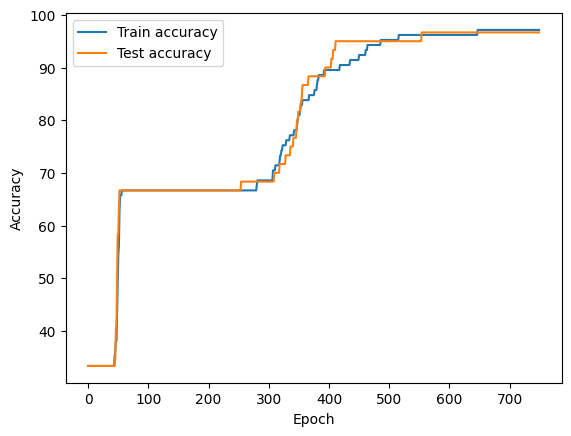

In [14]:
plt.plot(train_accs, label="Train accuracy")
plt.plot(test_accs, label="Test accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()